In [1]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv('/content/KaggleV2-May-2016.csv')

# Identify missing values
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


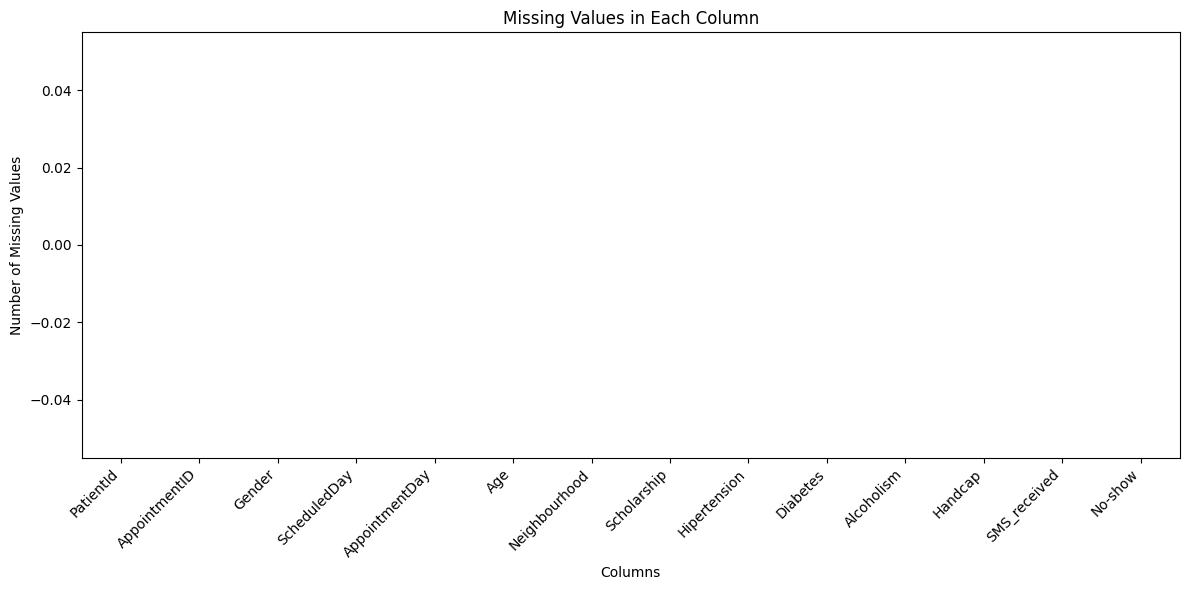

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [3]:
numerical_cols = df.select_dtypes(include='number').columns

print("Applying median imputation to numerical columns (if any missing values existed):")
for col in numerical_cols:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"  - Imputed missing values in column '{col}' with median: {median_val}")
    else:
        print(f"  - Column '{col}' has no missing values. No imputation applied.")

print("\nMissing values after numerical imputation:")
print(df[numerical_cols].isnull().sum())

Applying median imputation to numerical columns (if any missing values existed):
  - Column 'PatientId' has no missing values. No imputation applied.
  - Column 'AppointmentID' has no missing values. No imputation applied.
  - Column 'Age' has no missing values. No imputation applied.
  - Column 'Scholarship' has no missing values. No imputation applied.
  - Column 'Hipertension' has no missing values. No imputation applied.
  - Column 'Diabetes' has no missing values. No imputation applied.
  - Column 'Alcoholism' has no missing values. No imputation applied.
  - Column 'Handcap' has no missing values. No imputation applied.
  - Column 'SMS_received' has no missing values. No imputation applied.

Missing values after numerical imputation:
PatientId        0
AppointmentID    0
Age              0
Scholarship      0
Hipertension     0
Diabetes         0
Alcoholism       0
Handcap          0
SMS_received     0
dtype: int64


In [4]:
categorical_cols = df.select_dtypes(include='object').columns

print("Applying mode imputation to categorical columns (if any missing values existed):")
for col in categorical_cols:
    if df[col].isnull().any():
        mode_val = df[col].mode()[0] # Select the first mode if multiple exist
        df[col].fillna(mode_val, inplace=True)
        print(f"  - Imputed missing values in column '{col}' with mode: {mode_val}")
    else:
        print(f"  - Column '{col}' has no missing values. No imputation applied.")

print("\nMissing values after categorical imputation:")
print(df[categorical_cols].isnull().sum())

Applying mode imputation to categorical columns (if any missing values existed):
  - Column 'Gender' has no missing values. No imputation applied.
  - Column 'ScheduledDay' has no missing values. No imputation applied.
  - Column 'AppointmentDay' has no missing values. No imputation applied.
  - Column 'Neighbourhood' has no missing values. No imputation applied.
  - Column 'No-show' has no missing values. No imputation applied.

Missing values after categorical imputation:
Gender            0
ScheduledDay      0
AppointmentDay    0
Neighbourhood     0
No-show           0
dtype: int64


In [5]:
print(f"DataFrame shape before removing columns: {df.shape}")

# 1. Define a threshold for the percentage of missing values
missing_threshold = 0.5 # 50%

# 2. Calculate the percentage of missing values for each column
missing_percentage = df.isnull().sum() / len(df)

# 3. Identify columns where the percentage of missing values is greater than the defined threshold
columns_to_drop = missing_percentage[missing_percentage > missing_threshold].index.tolist()

# 4. Drop these identified columns from the DataFrame
if columns_to_drop:
    print(f"\nRemoving columns with more than {missing_threshold*100}% missing values: {columns_to_drop}")
    df.drop(columns=columns_to_drop, inplace=True)
else:
    print(f"\nNo columns found with more than {missing_threshold*100}% missing values. No columns removed.")

# 5. Print the names of any columns that were removed (already done in the if/else block)

# 6. Print the shape of the DataFrame before and after this step to show the impact
print(f"DataFrame shape after removing columns: {df.shape}")

DataFrame shape before removing columns: (110527, 14)

No columns found with more than 50.0% missing values. No columns removed.
DataFrame shape after removing columns: (110527, 14)


In [6]:
print("Missing values after cleaning:")
print(df.isnull().sum())

print("\nData types after cleaning:")
df.info()

print("\nDescriptive statistics for numerical columns after cleaning:")
print(df.describe())

Missing values after cleaning:
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Data types after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non

In [7]:
df_original = pd.read_csv('/content/KaggleV2-May-2016.csv')

print("--- Before Cleaning ---")
print(f"Original DataFrame shape: {df_original.shape}")
print(f"Total missing values in original DataFrame: {df_original.isnull().sum().sum()}")

print("\n--- After Cleaning ---")
print(f"Cleaned DataFrame shape: {df.shape}")
print(f"Total missing values in cleaned DataFrame: {df.isnull().sum().sum()}")

--- Before Cleaning ---
Original DataFrame shape: (110527, 14)
Total missing values in original DataFrame: 0

--- After Cleaning ---
Cleaned DataFrame shape: (110527, 14)
Total missing values in cleaned DataFrame: 0


### Summary of Data Cleaning Impact

**Dataset Size:**
- Before Cleaning: The original DataFrame had a shape of (110527 rows, 14 columns).
- After Cleaning: The cleaned DataFrame `df` maintains the same shape of (110527 rows, 14 columns).
- **Impact:** No rows or columns were removed during the cleaning process, indicating that the dataset size remained unchanged.

**Missing Values:**
- Before Cleaning: The original DataFrame had 0 total missing values.
- After Cleaning: The cleaned DataFrame `df` also has 0 total missing values.
- **Impact:** The dataset was already complete with no missing values. The imputation steps for numerical and categorical columns, and the step to remove columns with high missing values, did not alter the missing value count as there were none to begin with. This confirms the data's initial integrity regarding completeness.

In [8]:
output_file_path = '/content/cleaned_KaggleV2-May-2016.csv'
df.to_csv(output_file_path, index=False)
print(f"Cleaned dataset saved to: {output_file_path}")

Cleaned dataset saved to: /content/cleaned_KaggleV2-May-2016.csv
